# <b><p style="background-color: #ff6200; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Task 26-> Classification Algorithms using scikit-learn</p>

# What is classification?
Classification is a supervised learning technique in machine learning where the goal is to predict the categorical label of a given input based on training data. This process involves assigning inputs to one of several predefined categories. The training data consists of input-output pairs where the output is a categorical value, such as "spam" or "not spam" in an email filtering system.

The primary objective of classification is to develop a model that accurately assigns new, unseen inputs to one of the existing categories. This model is built using various features from the training data, which help to distinguish between the different categories. Classification is widely used in various applications, including medical diagnosis, sentiment analysis, image recognition, and fraud detection.

In summary, classification is a fundamental task in machine learning that deals with predicting discrete labels for new instances based on learned patterns from labeled training data. It forms the backbone of many practical applications that require decision-making based on categorical outcomes.

## Implemented Models

1. [Logistic Regression](#1)
2. [k-Nearest Neighbors (KNN)](#2)
3. [Support Vector Machines (SVM)](#3)
4. [Decision Tree Classifier](#4)
5. [Random Forests Classifier](#5)
6. [Gradient Boosting Classifier](#6)
7. [Naive Bayes Classifier](#7)

## <b><span style='color:#ff6200'> Importing Libraries</span>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## <b><span style='color:#ff6200'> Importing and Preprocessing of data</span>

In [2]:
social = pd.read_csv("Social_Network_Ads.csv", usecols=lambda column: column != 'User ID')
social['Gender'] = social['Gender'].map({'Male': 0, 'Female': 1})
social.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = social[['Age', 'EstimatedSalary']]
y = social['Purchased']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def evaluate_model(model, model_name):
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:")
    print(report)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='black', marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='black', marker='x')
    plt.title(f'Decision Boundary for {model_name}')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.show()

<a id=1></a>
# <b><span style='color:#ff6200'> Logistic Regression</span>

Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes).

Logistic Regression is used when the dependent variable (target) is categorical. It is one of the simplest algorithms used for binary classification problems. The model predicts the probability that a given input point belongs to a certain class.

### Logistic Function (Sigmoid Function)
The logistic regression model uses the logistic function to squeeze the output of a linear equation between 0 and 1. The logistic function is defined as:

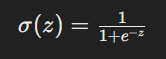

where 𝑧 is the linear combination of input features.

### Model Representation
For a binary classification problem, the logistic regression model can be represented as:

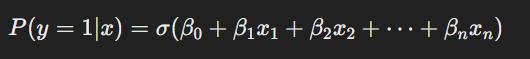

where:
P(y=1∣x) is the probability that the target 
𝑦 is 1 given the feature vector.

### Decision Boundary
The decision boundary is determined by the threshold value. If the predicted probability is greater than or equal to the threshold, the model classifies the input as the positive class (1), otherwise, it classifies it as the negative class (0).

### Cost Function
The cost function used in logistic regression is the log-loss or binary cross-entropy loss, which is defined as:

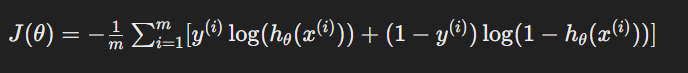

where:

𝑚 is the number of training examples.
y(i) is the actual label of the i-th training example.

Model: Logistic Regression
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



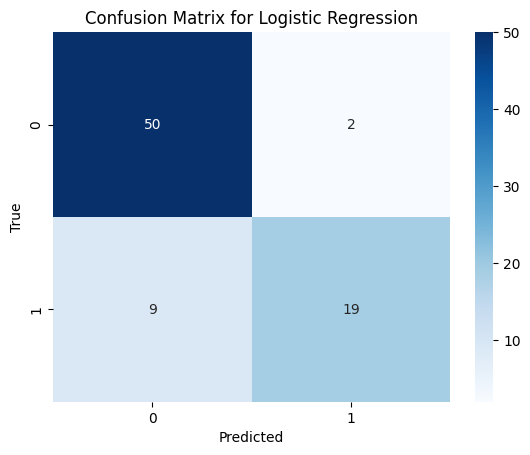

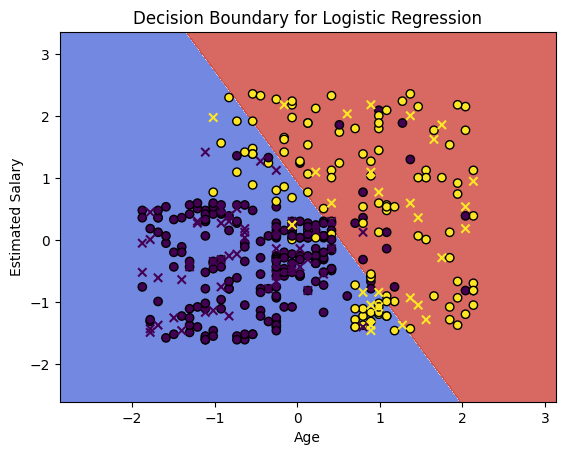

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
evaluate_model(log_reg, "Logistic Regression")

<a id=2></a>
# <b><span style='color:#ff6200'> K-Nearest Neighbors (KNN)</span>

The k-Nearest Neighbors (kNN) classifier is a type of instance-based learning or non-generalizing learning. In kNN classification, the algorithm does not explicitly learn a model. Instead, it memorizes the training instances, which are used for making predictions during the test phase.

## How kNN Works
#### Training Phase:
- In kNN, the training phase consists of storing the feature vectors and class labels of the training samples.

#### Prediction Phase:
- For a new sample that needs to be classified, the kNN algorithm finds the 
𝑘
k training samples that are closest to the new sample.
- "Closeness" is typically measured using a distance metric such as Euclidean distance, Manhattan distance, or Minkowski distance.
- The algorithm then assigns the new sample to the class that is most common among its 
𝑘
k nearest neighbors.
### Choosing 𝑘
- The choice of k is crucial for the performance of the kNN classifier.
- A small k (e.g., k=1) may lead to noisy predictions and overfitting.
- A large k smooths out the predictions but may cause underfitting.
- Typically, k is chosen through cross-validation to balance the bias-variance tradeoff.

## Distance Metrics
- **Euclidean Distance:** The most common metric, calculated as the square root of the sum of the squared differences between corresponding features of the two instances.
  
    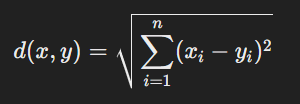
- **Manhattan Distance:** The sum of the absolute differences between corresponding features.
  
  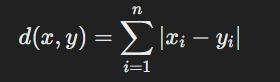

- **Minkowski Distance:** A generalization of Euclidean and Manhattan distances, with a parameter p that defines the distance.
  
    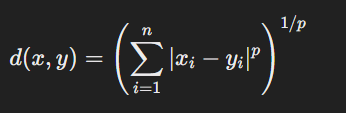


Model: k-Nearest Neighbors
Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



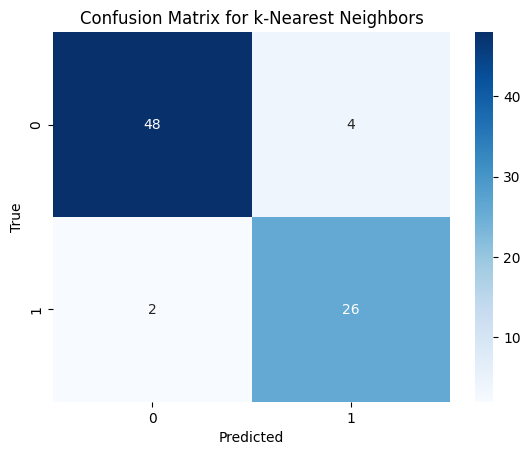

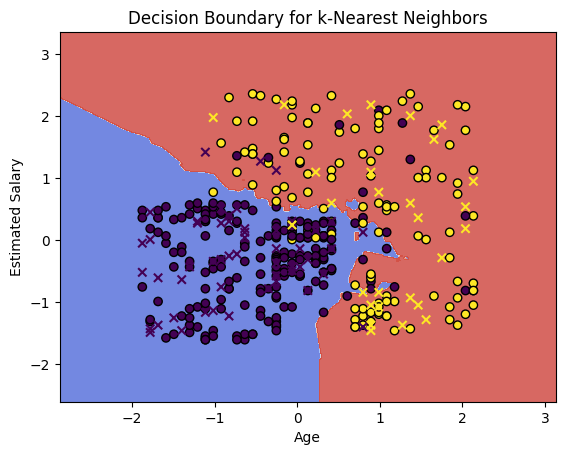

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, "k-Nearest Neighbors")

<a id=3></a>
# <b><span style='color:#ff6200'> Support Vector Machines (SVM)</span>

Support Vector Machine (SVM) is a powerful supervised learning algorithm used for classification and regression tasks. It is widely recognized for its ability to handle high-dimensional data and perform well in both linear and non-linear classification.

## How SVM Works
#### Linear SVM:
The core idea of a linear SVM is to find the optimal hyperplane that best separates the classes in the feature space.
The hyperplane is defined as a flat affine subspace of the feature space that maximizes the margin, which is the distance between the hyperplane and the nearest data points from either class. These nearest data points are called support vectors.
#### Non-Linear SVM:
When data is not linearly separable, SVM uses the kernel trick to project the data into a higher-dimensional space where a linear hyperplane can be used to separate the classes.
Common kernel functions include the polynomial kernel, radial basis function (RBF) kernel, and sigmoid kernel.

## Choosing the Optimal Hyperplane
- The optimal hyperplane is the one that maximizes the margin between the classes.
- The margin is defined as the distance between the hyperplane and the closest data points from each class.
- Mathematically, the optimization problem is formulated as:
  
  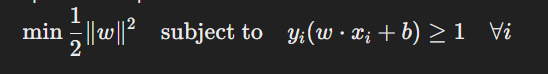
  
    where 𝑤 is the weight vector, 𝑏 is the bias term, 𝑥𝑖 are the training samples, and 𝑦𝑖 are the class labels.

## Applications of SVM
- Text Classification: SVM is commonly used for spam detection, sentiment analysis, and other text classification tasks.
- Image Classification: SVM can classify images by recognizing patterns and features within the data.
- Bioinformatics: SVM is used for classifying proteins and genes, and for other tasks in computational biology.
- Handwriting Recognition: SVM can be used to recognize handwritten characters and digits.

Model: Support Vector Machine
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



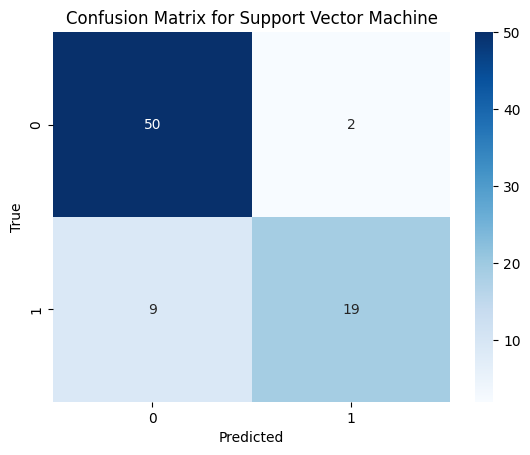

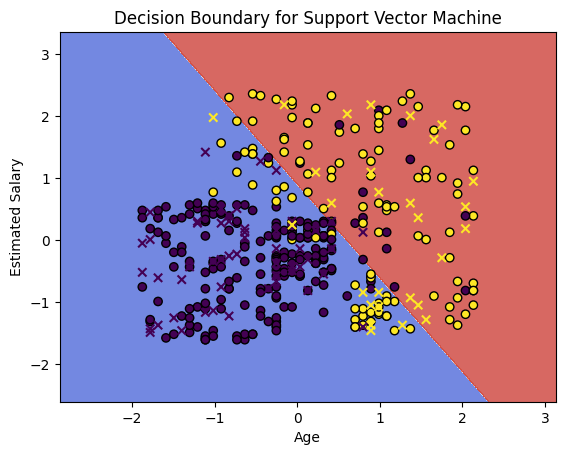

In [7]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True)
evaluate_model(svm, "Support Vector Machine")

<a id=4></a>
# <b><span style='color:#ff6200'> Decision Tree Classifier</span>

A Decision Tree is a supervised learning algorithm that is used for both classification and regression tasks. It is a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. Decision trees are popular for their simplicity and interpretability.

## How Decision Trees Work
#### Structure:
- The model is composed of nodes, edges, and leaves.
- Root Node: The top node of the tree, representing the entire dataset, which is then split into two or more homogeneous sets.
- Internal Nodes: Nodes that represent the features of the dataset and the decision rules.
- Leaf Nodes: Terminal nodes that represent the final class labels or continuous values (for regression).

#### Splitting Criteria:
- Decision trees split the data at each node based on a feature that results in the most significant information gain or impurity reduction.
- Common splitting criteria include:
    - Gini Impurity: Measures the frequency at which a randomly chosen element would be incorrectly labeled.
      
      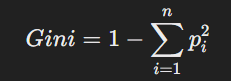

    - Entropy: Measures the amount of disorder or impurity.
 
      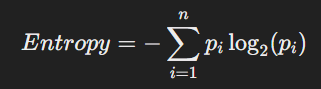
 
    - Information Gain: The reduction in entropy or impurity after a dataset is split on a feature.
 
      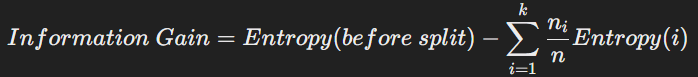

## Building a Decision Tree
### Select the Best Feature:
- Calculate the impurity or information gain for each feature.
- Select the feature that results in the best split (highest information gain or lowest impurity).
### Split the Dataset:

- Divide the dataset into subsets based on the selected feature.
### Repeat Recursively:

- For each subset, repeat the process of selecting the best feature and splitting until one of the stopping criteria is met (e.g., maximum depth, minimum samples per leaf, or no further information gain).
### Assign Class Labels:

- Assign the most common class label in each leaf node if it is a classification task.
- For regression tasks, assign the average value of the target variable.

Model: Decision Tree
Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        52
           1       0.86      0.89      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80



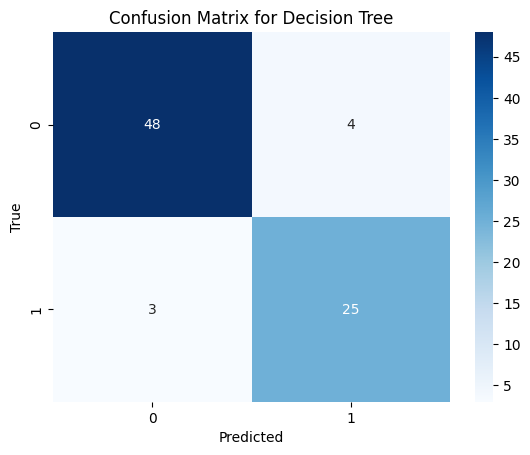

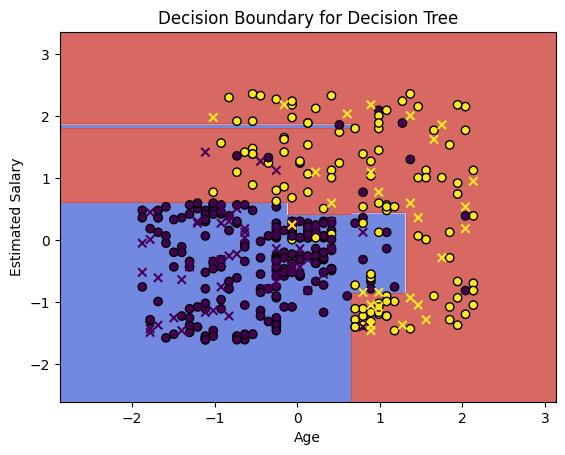

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

decision_tree = DecisionTreeClassifier(max_depth=4)
evaluate_model(decision_tree, "Decision Tree")

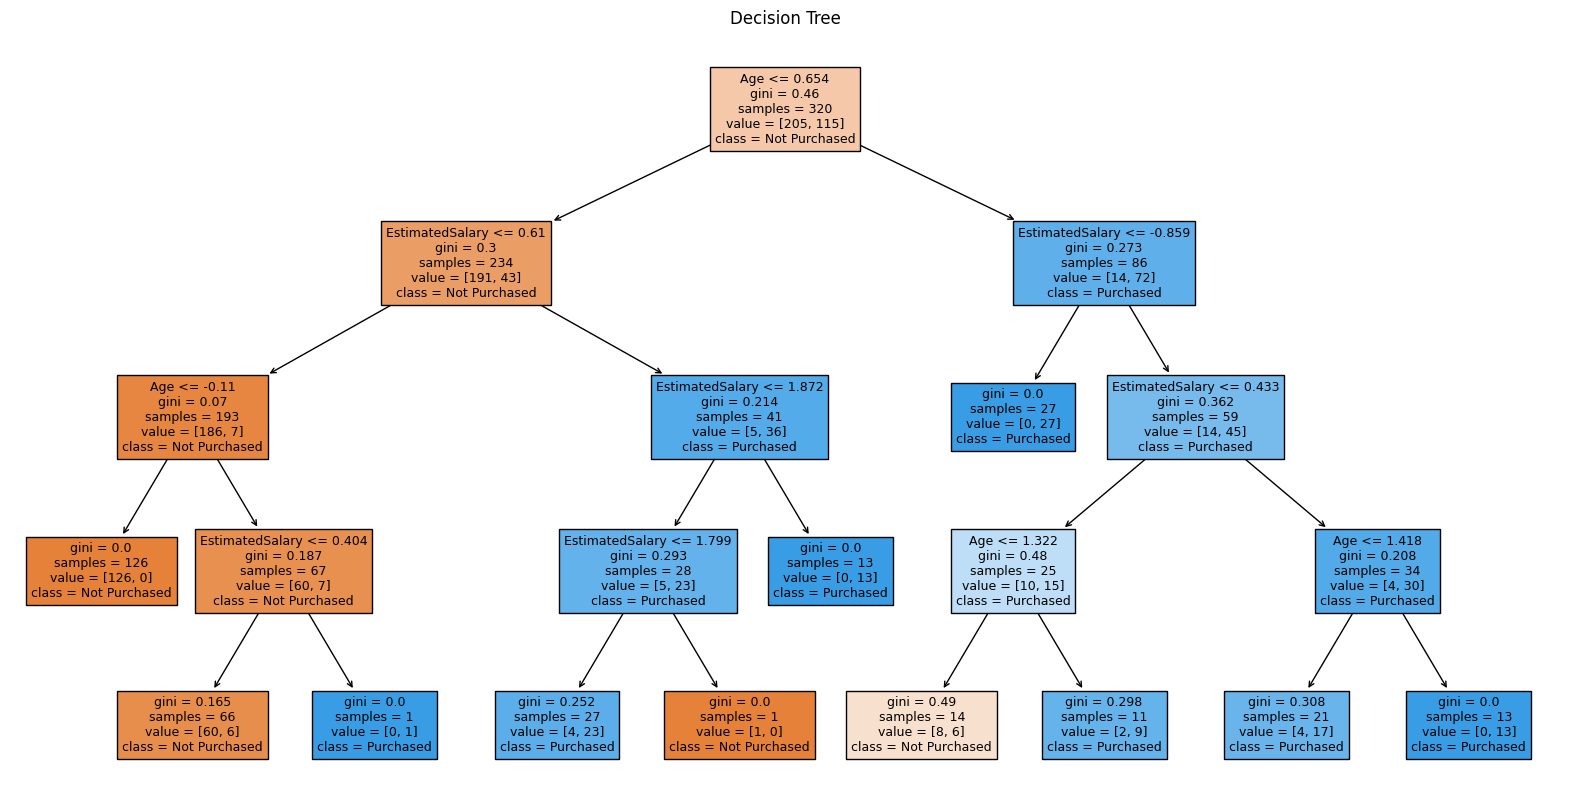

In [9]:
plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=['Age', 'EstimatedSalary'], class_names=['Not Purchased', 'Purchased'])
plt.title("Decision Tree")
plt.show()

<a id=5></a>
# <b><span style='color:#ff6200'> Random Forest Classifier</span>

Random Forest is an ensemble learning method that combines multiple decision trees to create a more powerful and robust model. It is used for both classification and regression tasks and addresses some of the limitations of individual decision trees, such as overfitting and instability.

## How Random Forest Works
#### Ensemble of Trees:

- A random forest consists of a large number of individual decision trees that operate as an ensemble.
- Each tree in the ensemble is built from a sample drawn with replacement (bootstrap sample) from the training set.
#### Random Feature Selection:

- At each split in the tree, a random subset of features is chosen, and the best split is found only within this subset. This process introduces more diversity among the trees and helps in reducing correlation between them.
#### Voting/Averaging:

- For classification tasks, each tree in the forest votes for a class, and the class with the majority votes is chosen as the final prediction.
- 
## Building a Random Forest
#### Bootstrap Sampling:

- Create multiple bootstrap samples from the training dataset. Each sample is created by randomly selecting data points with replacement.
#### Growing Trees:

- For each bootstrap sample, grow a decision tree. At each node, instead of considering all features, a random subset of features is chosen, and the best split is found within this subset.
- Grow the tree to the maximum extent (without pruning).
#### Making Predictions:

- For classification, each tree votes for a class, and the class with the most votes is the final prediction.
- For regression, the average of all tree predictions is the final output.

Model: Random Forest
Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        52
           1       0.81      0.89      0.85        28

    accuracy                           0.89        80
   macro avg       0.87      0.89      0.88        80
weighted avg       0.89      0.89      0.89        80



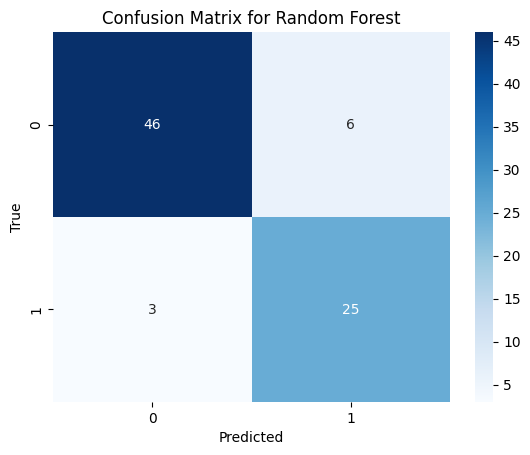

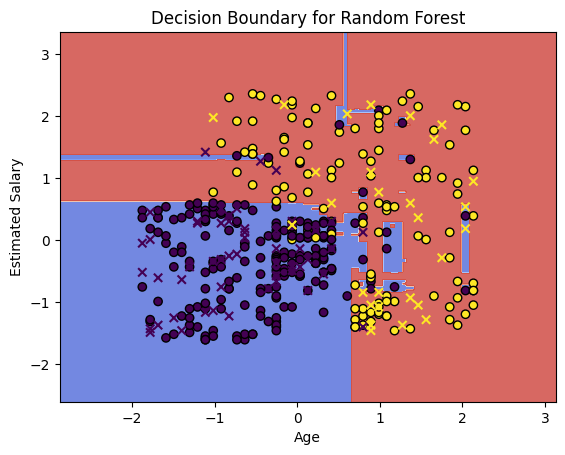

In [10]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

random_forest = RandomForestClassifier(n_estimators=100)
evaluate_model(random_forest, "Random Forest")

<a id=6></a>
# <b><span style='color:#ff6200'> Gradient Boosting Classifier</span>

Gradient Boosting is an ensemble learning technique that builds a model in a stage-wise fashion by sequentially adding weak learners (usually decision trees) to minimize a loss function. It is widely used for both classification and regression tasks and is known for its high predictive accuracy.

## How Gradient Boosting Works
#### Initialize the Model:

- Start with an initial model, usually a simple constant model that predicts the mean of the target variable for regression or the log odds for classification.
#### Additive Modeling:

- Sequentially add weak learners (e.g., decision trees) to the model. Each new learner is trained to correct the errors made by the combined ensemble of previous learners.
#### Gradient Descent:

- The new learner is trained to fit the negative gradient of the loss function with respect to the current model’s predictions.
-  This process effectively minimizes the loss function using gradient descent.
#### Update the Model:

- The current model is updated by adding the newly trained learner, usually with a scaling factor (learning rate) to control the contribution of each learner.
#### Repeat:

- This process is repeated for a specified number of iterations or until the model performance converges.
## Key Components
#### Loss Function:

- The loss function measures the difference between the predicted and actual values. Common loss functions include mean squared error for regression and logistic loss for binary classification.
#### Weak Learners:

- Typically, decision trees with limited depth (stumps) are used as weak learners. These simple models are iteratively improved to create a strong predictive model.
#### Learning Rate:

- A hyperparameter that controls the contribution of each weak learner. A lower learning rate requires more iterations but can lead to better performance.
#### Number of Iterations:

- The number of boosting stages to be run. More iterations generally improve performance but also increase the risk of overfitting.

Model: Gradient Boosting
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        52
           1       0.81      0.79      0.80        28

    accuracy                           0.86        80
   macro avg       0.85      0.84      0.85        80
weighted avg       0.86      0.86      0.86        80



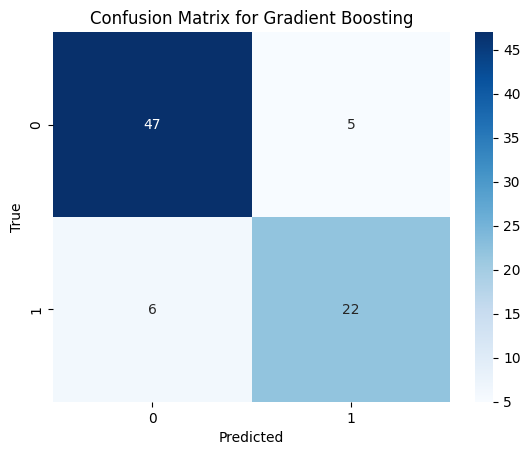

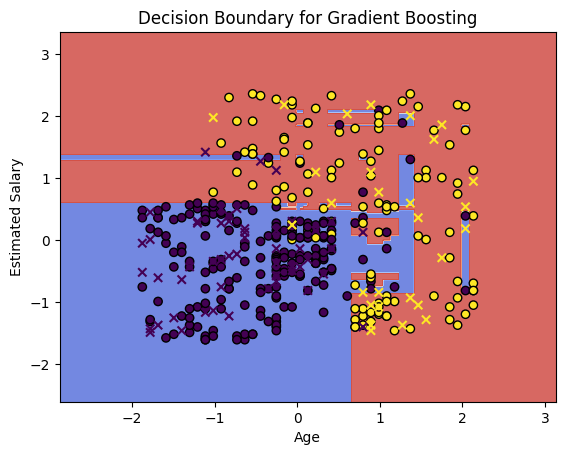

In [11]:
gradient_boosting = GradientBoostingClassifier()
evaluate_model(gradient_boosting, "Gradient Boosting")

<a id=7></a>
# <b><span style='color:#ff6200'> Naive Bayes Classifier</span>

Naive Bayes is a family of probabilistic algorithms based on applying Bayes' theorem with the assumption of independence between every pair of features. Despite its simplicity, it is effective and commonly used for classification tasks, particularly for text classification.

## How Naive Bayes Works
#### Bayes' Theorem:

- Naive Bayes classifiers rely on Bayes' theorem, which describes the probability of an event based on prior knowledge of conditions that might be related to the event.
  
  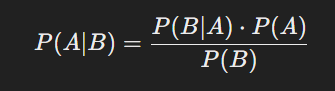

#### Naive Assumption:

- The "naive" aspect of Naive Bayes is the assumption that all features are independent given the class label. This simplifies the computation of probabilities:

  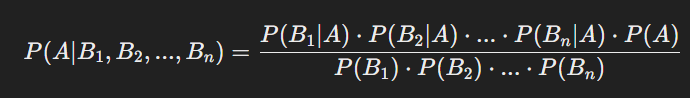

#### Classification:

- For a given instance, the class with the highest posterior probability is chosen as the predicted class:

  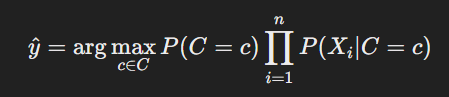

Model: Naive Bayes
Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



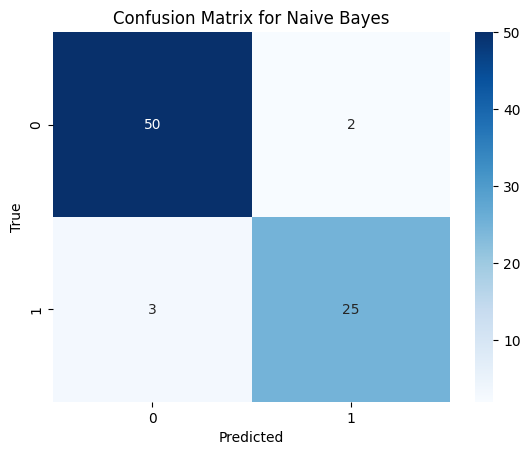

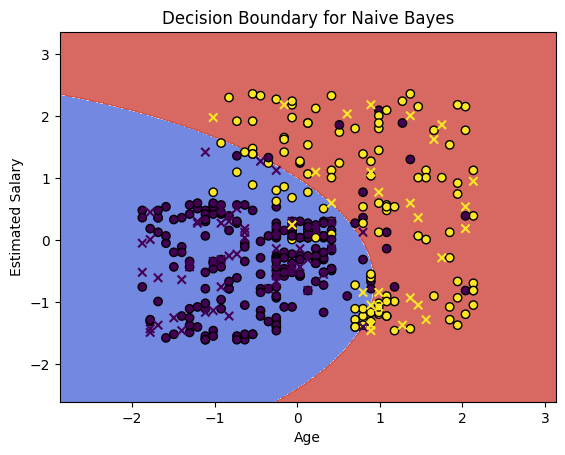

In [12]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
evaluate_model(naive_bayes, "Naive Bayes")